Otwierany folder: AutoML-projekt-2

In [2]:
import sys
import os

project_path = os.path.abspath('..')
sys.path.append(project_path)

from autopocket.main import AutoPocketor


c:\Users\macie\anaconda3\envs\amlpro2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
print(sys.path)

['c:\\Users\\macie\\anaconda3\\envs\\amlpro2\\python310.zip', 'c:\\Users\\macie\\anaconda3\\envs\\amlpro2\\DLLs', 'c:\\Users\\macie\\anaconda3\\envs\\amlpro2\\lib', 'c:\\Users\\macie\\anaconda3\\envs\\amlpro2', '', 'c:\\Users\\macie\\anaconda3\\envs\\amlpro2\\lib\\site-packages', 'c:\\Users\\macie\\anaconda3\\envs\\amlpro2\\lib\\site-packages\\win32', 'c:\\Users\\macie\\anaconda3\\envs\\amlpro2\\lib\\site-packages\\win32\\lib', 'c:\\Users\\macie\\anaconda3\\envs\\amlpro2\\lib\\site-packages\\Pythonwin', 'c:\\Users\\macie\\anaconda3\\envs\\amlpro2\\lib\\site-packages\\setuptools\\_vendor', 'c:\\Users\\macie\\OneDrive - Politechnika Warszawska\\Pulpit\\STUDIA\\SEMESTR5\\AutoML\\Projekty\\AutoML-projekt-2', 'c:\\Users\\macie\\OneDrive - Politechnika Warszawska\\Pulpit\\STUDIA\\SEMESTR5\\AutoML\\Projekty\\AutoML-projekt-2']


In [4]:
directory = 'data/' 
print("Zawartość katalogu 'example/data/':", os.listdir(directory))

Zawartość katalogu 'example/data/': ['car_insurance.csv', 'walmart.csv']


Preprocessing done
Best score (GINI): 0.0927687819110139
Modelling done
DecisionTreeClassifier


<Figure size 1200x600 with 0 Axes>

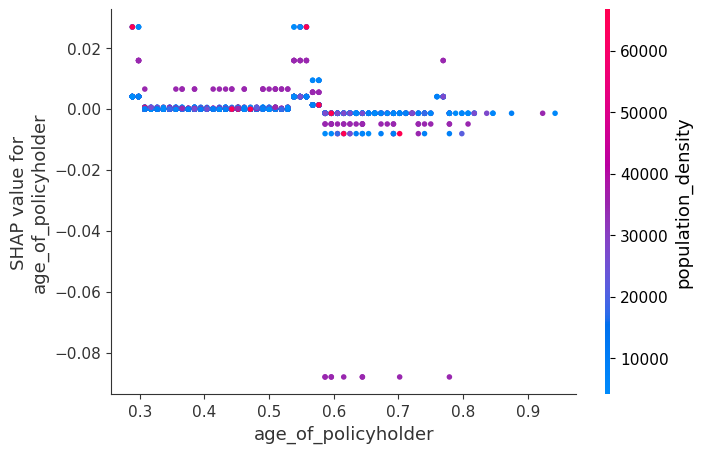

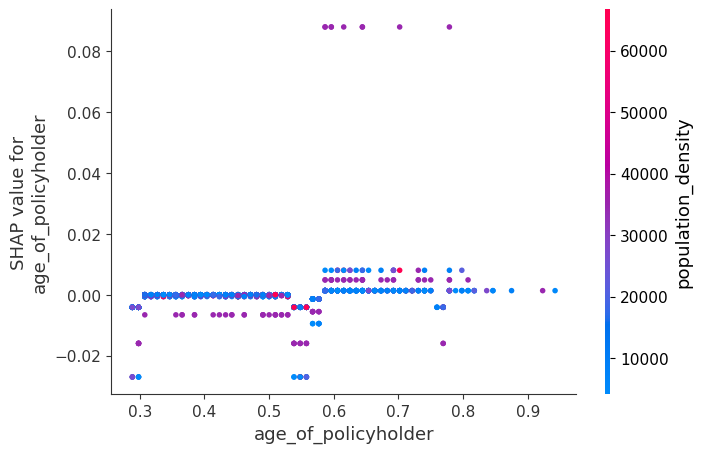

In [5]:
AutoPocketor().doJob("data/car_insurance.csv", "is_claim")